# Desafío 2 - Expansiones basales

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras

#### Descripción
* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

### Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pygam import LinearGAM
from pygam.utils import generate_X_grid
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importa base de datos
df_original = pd.read_csv("compresive_strength_concrete.csv")
display(df_original.head())

# Se cambian los nombres de las columnas
df = pd.read_csv('compresive_strength_concrete.csv', header=0, names=['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength'])
display(df.head())
display(df.shape)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


(1030, 9)

### Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [3]:
# Descripción preilminar de los datos
display(df.info())
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


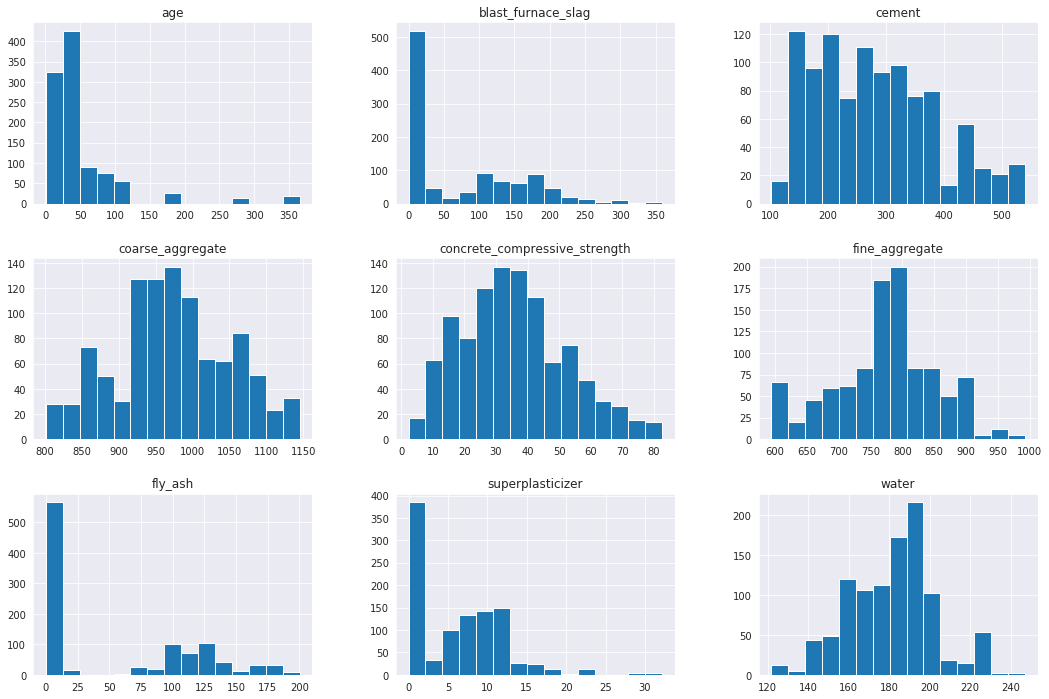

<Figure size 432x288 with 0 Axes>

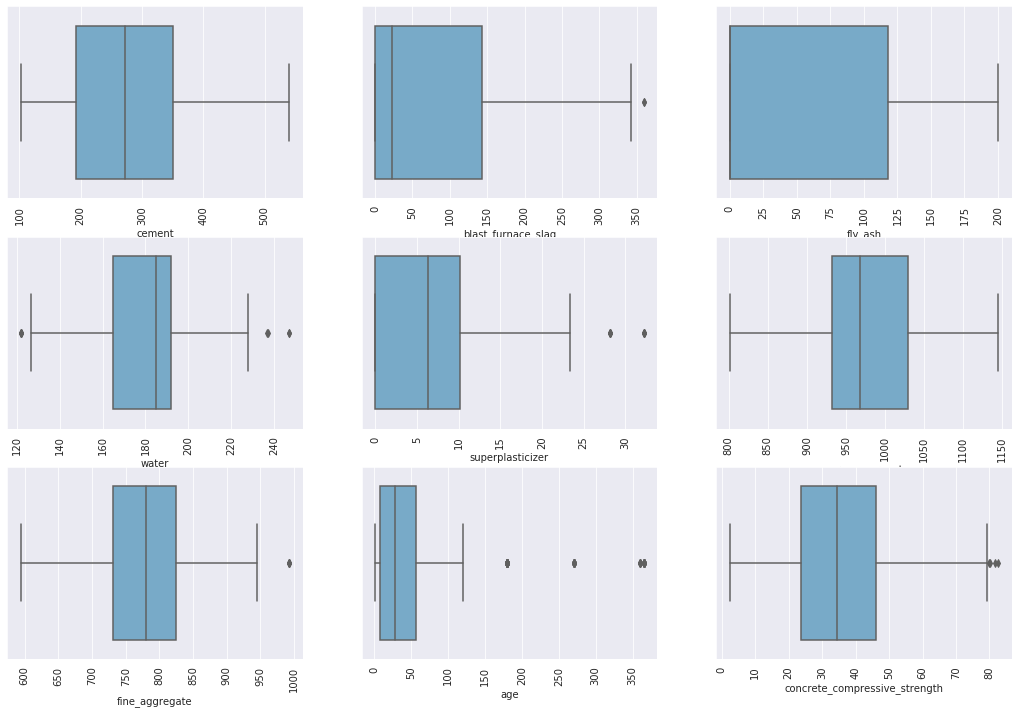

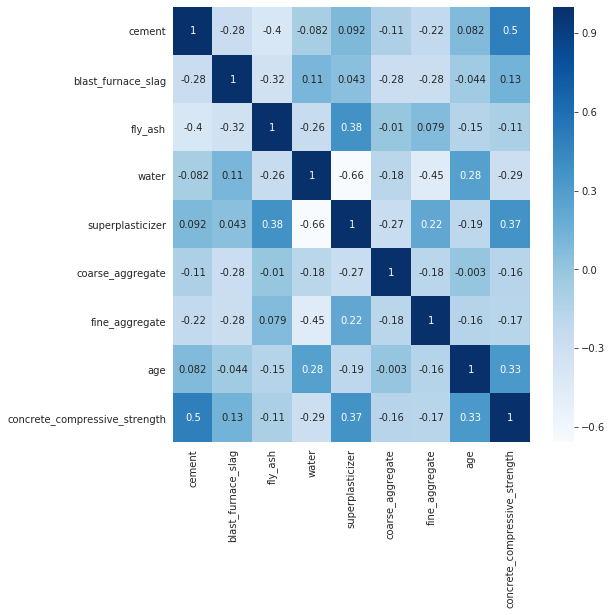

In [4]:
# Histogramas de los atributos
df.hist(bins=15, figsize=(18, 12), layout=(3, 3));

# Boxplots
plt.figure()
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.boxplot(x=df[variable], ax=subplot, palette="Blues", orient="h")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
# Heatmap de correlaciones
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

* Respecto a la $correlación$ con el vector objetivo, destaca la correlación positiva con el atriuto 'cement'.
* Respecto a la $normalización$, hay varios atributos que presentan distribuciones desbalanceadas hacia valores de un extremo, como age, blast_furnace_slag, fly_ash, superplasticize. Se podrían normalizar mediante la función Logaritmo, por ejemplo, pero surgen ciertas dudas. Las preguntas que nacen son: ¿Se puede normalizar sólo algunos de los atributos sin afectar el modelo? ¿Se debe normalizar todo el modelo a la vez? ¿Sólo se normaliza el vector objetivo, de manera de al final poder aplicar la función inversa respectiva? Ante estas preguntas y sin tener una respuesta clara, se decide no normalizar el modelo.

* Respecto al $escalado$, de acuerdo a las escalas que presentan los diferentes atributos, se decide qu el modelo necesita ser escalado.

In [5]:
# Escalar modelo
df_scaled = df.copy(deep=True)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns = df.columns)
display(df_scaled.head())
display(df_scaled.applymap(lambda x: round(x,3)).describe())

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.000008,-0.000057,0.000074,0.000044,0.000063,-0.000036,-0.000037,-0.000043,0.000008
std,1.000485,1.000542,1.000413,1.000462,1.000454,1.000534,1.000507,1.000540,1.000495
min,-1.715000,-0.857000,-0.847000,-2.800000,-1.039000,-2.212000,-2.241000,-0.707000,-2.006000
25%,-0.850250,-0.857000,-0.847000,-0.781000,-1.039000,-0.527000,-0.532000,-0.612000,-0.725250
50%,-0.079000,-0.602000,-0.847000,0.161000,0.033000,-0.063000,0.073500,-0.280000,-0.082500
75%,0.659000,0.800500,1.002000,0.489000,0.669000,0.727000,0.629000,0.164000,0.618000
max,2.478000,3.311000,2.281000,3.066000,4.354000,2.214000,2.733000,5.058000,2.802000


### Ejercicio 3: Modelo
* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch . Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [6]:
var_atributos = [x for x in df.columns if x != 'concrete_compressive_strength']
var_objetivo = [x for x in df.columns if x == 'concrete_compressive_strength']

# Genera subconjunto de entrenamiento y validación con escalado
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    df_scaled.loc[:, var_atributos],
    df_scaled.loc[:, var_objetivo],
    test_size=.33,
    random_state=1082019)

# Función que genera estadísticas del modelo
def report_gam_metrics(model, X_test, y_test):
    #print('Métricas para modelo {0}:'.format(str(model)))
    print('----------------------------------------')     
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test,
    model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test,
    model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,
    model.predict(X_test)).round(3)))
    
    

* **LinearGAM, GammaGAM, InvGaussGAM, LogisticGAM, PoissonGAM**: Al analizar el vector objetivo, este problema corresponde a una predicción de un vector numérico continuo, por lo que el modelo que corresponde implementar es de Regresión lineal, es decir, $LinearGAM$. De hecho, al intentar implementar los otros modelos, como LogisticGAM por ejemplo, hay problemas con los dominos de los datos, además las métricas en ese contecto cambian, ya no sería RMSE, si no accuracy por ejemplo.


In [7]:
# LinearGAM sin gridsearch
linear_gam = LinearGAM().fit(X_train_scaled, y_train_scaled)

# LinearGAM con gridsearch
search_params = {'lam': np.logspace(-3, 3, 11)}
linear_gam_grid = LinearGAM().gridsearch(X_train_scaled, y_train_scaled, **search_params)

# LinearGam métricas
report_gam_metrics(linear_gam, X_test_scaled, y_test_scaled)
report_gam_metrics(linear_gam_grid, X_test_scaled, y_test_scaled)

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


----------------------------------------
Test R^2 accuracy: 0.908
Test RMSE accuracy: 0.295
Test MAE accuracy: 0.199
----------------------------------------
Test R^2 accuracy: 0.906
Test RMSE accuracy: 0.298
Test MAE accuracy: 0.209


In [8]:
# Resumen modelo LinearGAM sin grid
linear_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      94.865
Link Function:                     IdentityLink Log Likelihood:                                 -2060.4191
Number of Samples:                          690 AIC:                                             4312.5682
                                                AICc:                                            4343.8796
                                                GCV:                                                  0.13
                                                Scale:                                              0.0983
                                                Pseudo R-Squared:                                   0.9173
Feature Function   Data Type      Num

In [9]:
# Resumen modelo LinearGAM con grid
linear_gam_grid.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     87.7808
Link Function:                     IdentityLink Log Likelihood:                                 -2041.7863
Number of Samples:                          690 AIC:                                             4261.1341
                                                AICc:                                            4287.6937
                                                GCV:                                                  0.13
                                                Scale:                                              0.1006
                                                Pseudo R-Squared:                                   0.9143
Feature Function   Data Type      Num

* Lo primero que se observa en base a los resultados del resumen, es que en ambos modelos todos los atributos tienen una significancia estadística dado su P-value. Se diferencian eso sí en la elección del hiperparámetro, mientras el modelo sin GridSearch usa un hiperparámetro lamda de valor $0.6$ (el cual es el por defecto), el modelo con GridSearch usa un hiperparámetro de valor $1.0$.

,LinerGAM sin GridSearch,LinerGAM con GridSearch
R2,0.908,0.906
RMSE,0.295,0.298
MAE,0.199,0.209


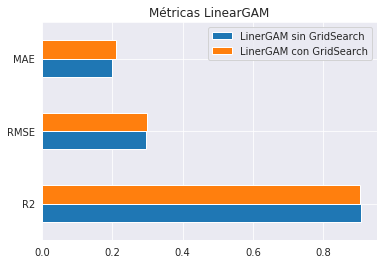

In [10]:
# Se comparan las métricas de cada modelo
data = { 'LinerGAM sin GridSearch': [r2_score(y_test_scaled,linear_gam.predict(X_test_scaled)).round(3), 
                                    np.sqrt(mean_squared_error(y_test_scaled,linear_gam.predict(X_test_scaled))).round(3),
                                    median_absolute_error(y_test_scaled,linear_gam.predict(X_test_scaled)).round(3)],
         'LinerGAM con GridSearch': [r2_score(y_test_scaled,linear_gam_grid.predict(X_test_scaled)).round(3), 
                                    np.sqrt(mean_squared_error(y_test_scaled,linear_gam_grid.predict(X_test_scaled))).round(3),
                                    median_absolute_error(y_test_scaled,linear_gam_grid.predict(X_test_scaled)).round(3)]
       }
errors_df = pd.DataFrame(data, index=['R2','RMSE','MAE'])
display(errors_df.head())
display(errors_df.plot(title='Métricas LinearGAM',kind='barh'))

* Respecto a las mérticas, con sorpersa se constata que el modelo sin GridSearch es mejor en todos los apartados, en particular para RMSE que es la métrica que más interesa.

### Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

In [11]:
def dep_parcial(linear_gam):
    
    # mediante generate_X_grid vamos a generar un array que contenga los valores de cada atributo
    x_grid = generate_X_grid(linear_gam)
    attribute = X_train_scaled.columns
    # generamos el dimensionado del grid en base a la cantidad de atributos
    cols = 4; rows = np.ceil(len(attribute) / cols)
    # Se define tañaño
    plt.figure(figsize=(12,6))
    # para cada atributo
    for i, n in enumerate(range(len(attribute))):
        plt.subplot(rows, cols, i + 1)
        # extraemos la dependencia parcial y sus intervalos de confianza al 95%
        partial_dep, confidence_intervals = linear_gam.partial_dependence(x_grid, feature= i + 1, width=0.95)
        # Visualizamos la recta
        plt.plot(x_grid[:, n], partial_dep, color='tomato')
        # Generamos una visualización de los intervalos de confianza
        plt.fill_between(x_grid[:, n], 
                         confidence_intervals[0][:, 0], 
                         confidence_intervals[0][:, 1], 
                         color='tomato', alpha=.25)
        # agregamos el nombre del atributo
        plt.title(attribute[n])
        plt.plot(X_train_scaled[attribute[n]],
                 [plt.ylim()[0]] * len(X_train_scaled[attribute[n]]),
                 '|', 
                 color='orange', alpha=.5)
        plt.tight_layout()

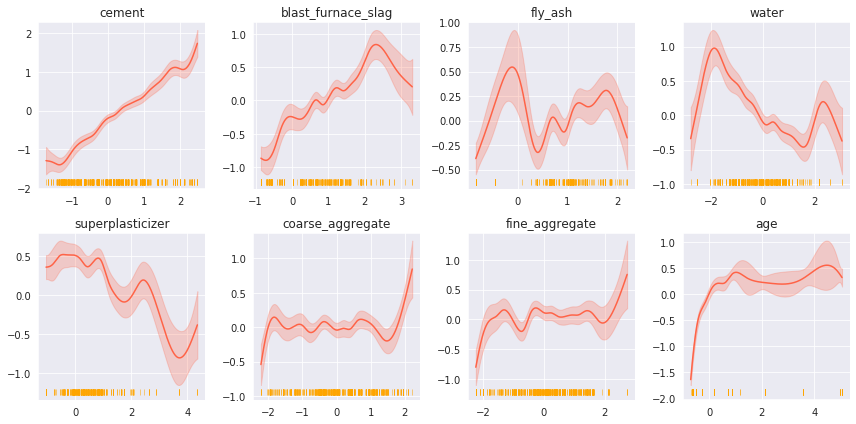

In [12]:
dep_parcial(linear_gam)

Se comentan las principales relaciones:
* $cement$: mientras más cemento, más fuerza compresiva.
* $water$: a medida que water sube, el valor máximo de la fuerza se alcanza al comienzo, luego la fuerza baja.
* $age$: a medida que age crece, la fuerza alcanza el valor máximo pronto y a mdida que aumenta se mantiene más o menos constante.
* $blast$ _ $furnace$ _ $slag$: sube la fuerza a medida que este valor se hace más grande, alcanza un máximo y luego baja.
* $coarse$ _ $aggregate$, fine_aggregate: a medida que crecen, la fuerza sube prontamente para estabilizarse y casi al final sube vertiginosamente.